# 图像中值滤波

In [4]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [5]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [6]:
#添加图像噪声
def salt(src,num):
    if type(src) == type(None):
        return None
    dst = src.copy()
    if len(src.shape) == 3 and src.shape[2] == 3:
        rows,cols,_ = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = (255,255,255)
    elif len(src.shape) == 2:
        rows,cols = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = 255
    else:
        return None
    
    return dst

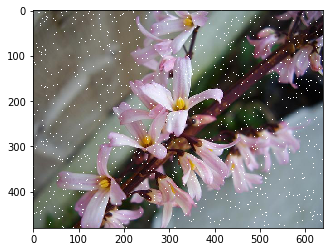

In [10]:
noise = salt(src,5000)
plt.imshow(noise)

In [11]:
'''
获取数组的中值
'''
def get_median(kernel):
    dst = sorted(kernel)
    if len(dst) % 2 == 0:
        return (dst[len(dst) // 2 - 1] + dst[len(dst) // 2]) / 2
    else:
        return dst[len(dst) // 2]
'''
中值滤波
'''
def median_blur(img):
    rows = img.shape[0]
    cols = img.shape[1]
    src = np.float32(img)
    dst = np.zeros_like(src)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            kernel_r = [src[i, j,0] / 255.0 , src[i - 1, j - 1,0] / 255.0 , src[i - 1, j,0] / 255.0 ,
                        src[i, j - 1,0] / 255.0 ,  src[i - 1, j + 1,0] / 255.0 , src[i + 1, j - 1,0] / 255.0 ,
                        src[i + 1, j + 1,0] / 255.0 , src[i, j + 1,0] / 255.0 ,  src[i + 1, j,0] / 255.0]
            median_r = get_median(kernel_r) * 255
    
            if median_r > 255:
                median_r = 255
                
            kernel_g = [src[i, j,1] / 255.0, src[i - 1, j - 1,1]/ 255.0 , src[i - 1, j,1]/ 255.0 ,
                        src[i, j - 1,1]/ 255.0 ,  src[i - 1, j + 1,1]/ 255.0 , src[i + 1, j - 1,1] / 255.0,
                        src[i + 1, j + 1,1]/ 255.0, src[i, j + 1,1]/ 255.0 ,  src[i + 1, j,1]/ 255.0]
            median_g = get_median(kernel_g) * 255
    
            if median_g > 255:
                median_g = 255
                
            kernel_b = [src[i, j,2]/ 255.0 , src[i - 1, j - 1,2]/ 255.0 , src[i - 1, j,2] / 255.0,
                    src[i, j - 1,2]/ 255.0 ,  src[i - 1, j + 1,2]/ 255.0 , src[i + 1, j - 1,2] / 255.0,
                    src[i + 1, j + 1,2] / 255.0, src[i, j + 1,2] / 255.0,  src[i + 1, j,2]/ 255.0]
            median_b = get_median(kernel_b) * 255
    
            if median_b > 255:
                median_b = 255
                
            dst[i,j,0] = median_r
            dst[i,j,1] = median_g
            dst[i,j,2] = median_b
    
    return cv2.convertScaleAbs(dst)

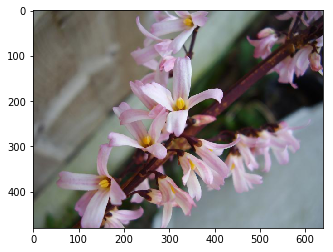

In [12]:
dst = median_blur(noise)
plt.imshow(dst)

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44917055